<font size ="4">**Importing all the libraries**</font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
import numpy as np
import os
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

<font size="4">**Read the data csv file**</font>

In [2]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true_data = pd.read_csv('data/True.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


<font size ="4">**Assigning Classes to the Dataset**</font>

In [4]:
true_data["label"] = 1
fake_data["label"] = 0

<font size ="4">**Merging Both the Dataset**</font>

In [5]:
data = pd.concat([true_data, fake_data], axis=0)

<font size ="4">**Visualization of the text data based on subject column**</font>

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

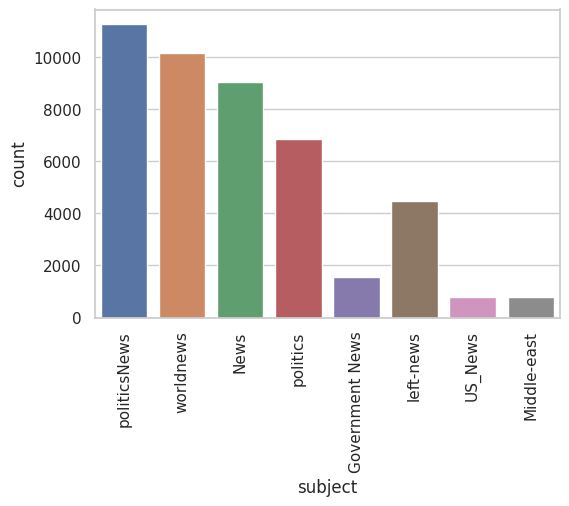

In [6]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

<font size="4">**Data preprocessing**</font>

In [7]:
data['text'] = data['title'] +' '+data['text']
del data['title']
del data['subject']
del data['date']

In [8]:
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [9]:
data.shape

(44898, 2)

<font size ="4">**Checking if there is any null value**</font>

In [10]:
data.isnull().sum()

text     0
label    0
dtype: int64

 <font size ="4">**Shuffle the dataset to prevent the model to get bias**</font>

In [11]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label
0,"Keystone XL builders can use non-U.S. steel, W...",1
1,Czech Babis gains possible support in bid for ...,1
2,Cheesy puns abound as White House hosts online...,1
3,Obama Admin Official Just Humiliated Trump By...,0
4,"Republican Senator Chokes, Mocks Trump In Bru...",0


<Axes: xlabel='label', ylabel='count'>

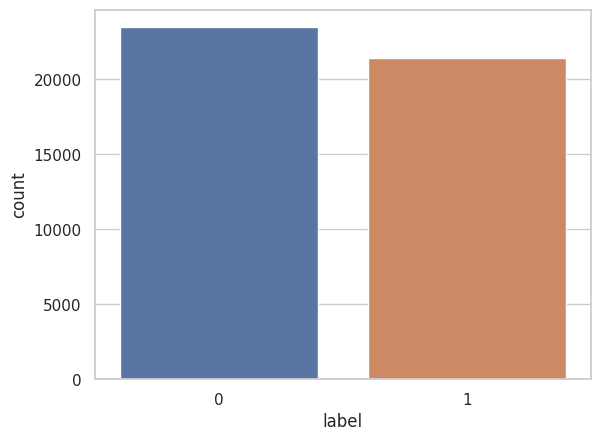

In [12]:
sns.countplot(data=data,
              x='label',
              order=data['label'].value_counts().index)

<font size="4">**Data Cleaning**</font>

In [13]:
def preprocess_text(text):
    return text
data['text'] = data['text'].apply(preprocess_text)

<font size ="4">**Convert text into vectors**</font>

In [14]:
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=42)

<font size ="4">**Model selection**</font>

In [15]:
x_train.head()

36335     Cops In Republican Senate Office Violently As...
12384    U.S. SEC chair grilled by Senate panel over cy...
24419    POST-OBAMA AMERICA: Liberal Thug Gets Physical...
24740    Russia says U.S. decision on Jerusalem may wor...
27039     The Working Class Just Got Screwed By Trump A...
Name: text, dtype: object

In [16]:
y_train.head()

36335    0
12384    1
24419    0
24740    1
27039    0
Name: label, dtype: int64

In [17]:
import string
def wordopt (text):
    text=text.lower()
    text=re.sub('\[.*?\]', '',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+', '',text)
    text=re.sub('<.*?>+', '',text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n', '',text)
    text=re.sub('\w*\d\w*', '',text)
    return text

In [18]:
data['text']=data['text'].apply(wordopt)

In [19]:
x=data['text']
y=data['label']

In [20]:
data.head(10)

,text,label
0,keystone xl builders can use non u s steel w...,1
1,czech babis gains possible support in bid for ...,1
2,cheesy puns abound as white house hosts online...,1
3,obama admin official just humiliated trump by...,0
4,republican senator chokes mocks trump in bru...,0
5,google is the engine of censorship century wi...,0
6,reeling republican establishment running out o...,1
7,st paul mn public schools white privilege t...,0
8,proof that obama interfered twice in foreign e...,0
9,tunisia parliament approves controversial amne...,1


<font size ="4">**USING LOGISTIC REGRESSION**</font>

In [21]:
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorization=TfidfVectorizer()
x_train=vectorization.fit_transform(x_train)
x_test=vectorization.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
pred_lr=lr.predict(x_test)
lr.score(x_test,y_test)

0.9889755011135858

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4713
           1       0.99      0.99      0.99      4267

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<font size ="4">**PLOTTING CONFUSION MATRIX**</font>

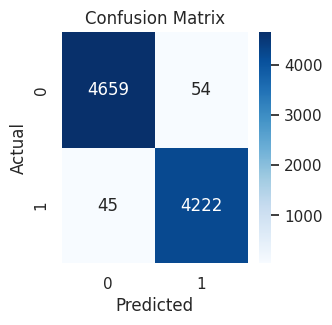

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred = lr.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)

class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(3,3 ))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



<font size="4">**ACCURACY VS THRESHOLD GRAPH**</font>

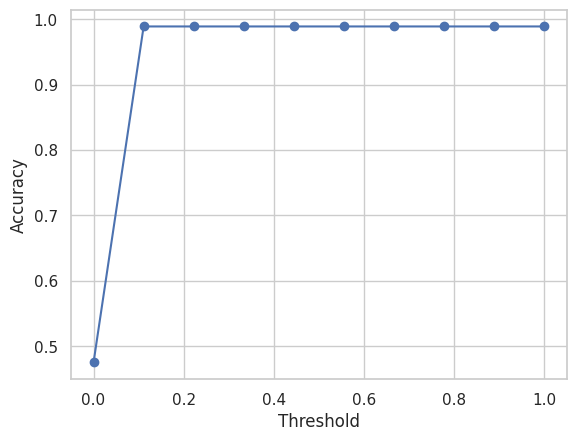

In [26]:
import matplotlib.pyplot as plt
import numpy as np

thresholds = np.linspace(0, 1, 10)
accuracy_scores = []

for threshold in thresholds:
    pred_lr_threshold = (pred_lr >= threshold).astype(int)
    accuracy = np.mean(pred_lr_threshold == y_test)
    accuracy_scores.append(accuracy)

plt.plot(thresholds, accuracy_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()


<font size ="4">**USING DECISION TREE CLASSIFIER**</font>

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
pred_dt=dt.predict(x_test)
dt.score(x_test,y_test)

0.9966592427616926

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4713
           1       1.00      1.00      1.00      4267

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



<font size ="4">**PLOTTING CONFUSION MATRIX**</font>

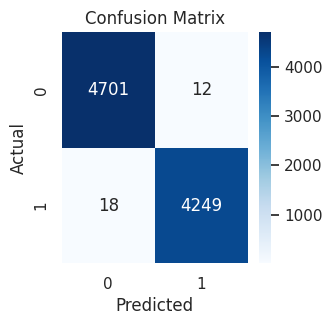

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred = dt.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)

class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(3,3 ))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<font size="4">**ACCURACY VS THRESHOLD GRAPH**</font>

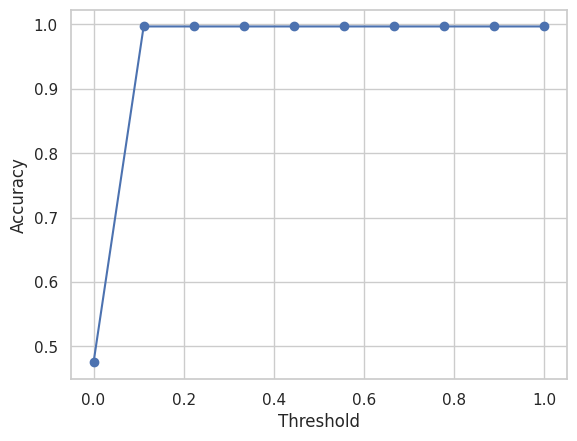

In [31]:
import matplotlib.pyplot as plt
import numpy as np

thresholds = np.linspace(0, 1, 10)
accuracy_scores = []

for threshold in thresholds:
    pred_dt_threshold = (pred_dt>= threshold).astype(int)
    accuracy = np.mean(pred_dt_threshold == y_test)
    accuracy_scores.append(accuracy)

plt.plot(thresholds, accuracy_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()


<font size ="4">**USING NAIVE BAYES**</font>

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [33]:
pred_nb=nb.predict(x_test)
nb.score(x_test,y_test)

0.9422048997772828

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4713
           1       0.95      0.93      0.94      4267

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



<font size ="4">**PLOTTING CONFUSION MATRIX**</font>

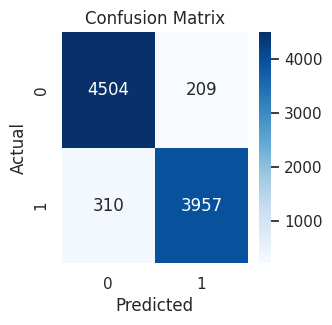

In [35]:
import seaborn as sns
from sklearn import metrics

y_pred = nb.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<font size="4">**ACCURACY VS THRESHOLD GRAPH**</font>

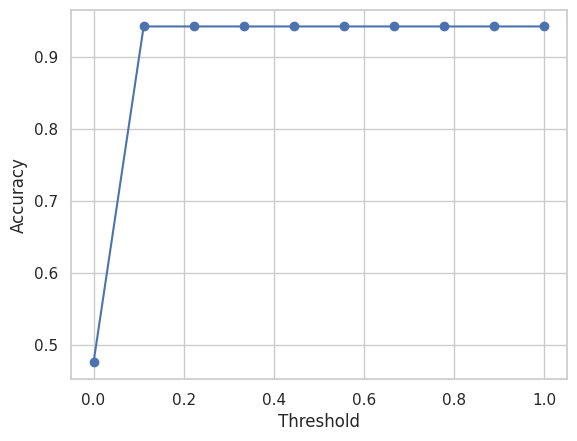

In [36]:
import matplotlib.pyplot as plt
import numpy as np

thresholds = np.linspace(0, 1, 10)
accuracy_scores = []

for threshold in thresholds:
    pred_nb_threshold = (pred_nb >= threshold).astype(int)
    accuracy = np.mean(pred_nb_threshold == y_test)
    accuracy_scores.append(accuracy)

plt.plot(thresholds, accuracy_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()


<font size ="4">**MANUAL TESTING**</font>

In [37]:
def output_lable(n):
    if n==0:
        return"fake news"
    elif n==1:
        return"not a fake news"
    
def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_lr=lr.predict(new_xv_test)
    pred_dt=dt.predict(new_xv_test)
    pred_nb=nb.predict(new_xv_test)
   
    
    return print("\n\nlr prediction:{} \ndt prediction:{} \nnb prediction:{}".format(output_lable(pred_lr[0]),output_lable(pred_dt[0]),output_lable(pred_nb[0])))
        

**A true news from the data set is being tested**

In [38]:
news = str(input())
manual_testing(news)

 WASHINGTON (Reuters) - Congressional Republicans reached a deal on final tax legislation on Wednesday, clearing the way for final votes next week on a package that would slash the U.S. corporate tax rate to 21 percent and cut taxes for wealthy Americans.  Under an agreement between the House of Representatives and the Senate, the corporate tax would be 1 percentage point higher than the 20 percent rate earlier proposed, but still far below the current headline rate of 35 percent, a deep tax reduction that corporations have sought for years. As they finalized the biggest tax overhaul in 30 years, Republicans wavered for weeks on whether to slash the top income tax rate for the wealthy. In the end, they agreed to cut it to 37 percent from the current 39.6 percent. That was despite criticism from Democrats that the Republican plan tilts toward the rich and corporations, offering little to the middle class. â€œI think weâ€™ve got a pretty good deal,â€ Senate Finance Committee Chairman Or



lr prediction:not a fake news 
dt prediction:not a fake news 
nb prediction:not a fake news


**A fake news from the dataset is being tested**

In [39]:
news = str(input())
manual_testing(news)

  On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the f



lr prediction:fake news 
dt prediction:fake news 
nb prediction:fake news


<font size ="4">**ACCURACY COMPARISON**</font>

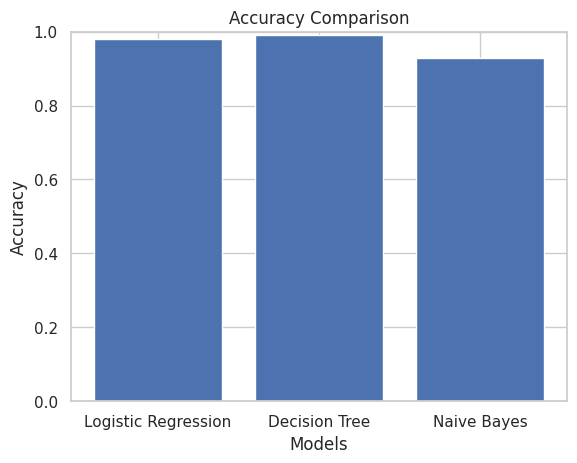

In [40]:
import matplotlib.pyplot as plt

accuracy_scores = [0.98, 0.99, 0.93]
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes']

plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim([0, 1]) 
plt.show()